<a href="https://colab.research.google.com/github/Ariara61/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_512~516%2C_529~543.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 06. 토픽 모델링(Topic Modeling) - 20 뉴스그룹
* 토픽 모델링: 문서 집합에 숨어 있는 주제를 찾아내는 것. 숨어 있는 중요 주제를 효과적으로 찾아낼 수 있음.
* 사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해, 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출
>
* 머신러닝 기반의 토픽 모델링에 자주 사용되는 기법은 LSA
* 사이킷런은 LDA 기반의 토픽 모델링을 LatentDirichletAllocation 클래스로 제공.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출.
cats = ["rec.motorcycles", "rec.sport.baseball", "comp.graphics", "comp.windows.x",
        "talk.politics.mideast", "soc.religion.christian", "sci.electronics", "sci.med"]

# 위에서 cats 변수로 기재된 카테고리만 추출. fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset = "all", remove = ("headers", "footers", "quotes"),
                             categories = cats, random_state = 0)

# LDA는 Count기반의 벡터화만 적용합니다.
count_vect = CountVectorizer(max_df = 0.95, max_features = 1000, min_df = 2, stop_words = "english",
                             ngram_range = (1, 2))
feat_vect = count_vect.fit_transform(news_df.data)
print("CountVectorizer Shape: ", feat_vect.shape)

CountVectorizer Shape:  (7862, 1000)


* CountVectorizer 객체 변수인 feat_vect 모두 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터
* 피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링을 수행
* LatentDirichletAllocation 클래스의 n_components 파라미터를 이용해 이 토픽 개수를 조정

In [2]:
lda = LatentDirichletAllocation(n_components = 8, random_state = 0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

* LatentDirichletAllocation.fit(데이터 세트)을 수행하면 LatentDirichletAllocation 객체는 components_ 속성값을 가지게 됨.
* components_는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 가지고 있음.
* 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 됨.

In [3]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

* 8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 가지고 있음.
* 즉, components_array의 0번째 row, 10번째 col에 있는 값은 Topic #0에 대해서 벡터화된 행렬에서 10번째 칼럼에 해당하는 피처가 Topic #0에 연관되는 수치 값을 가지고 있음.
* lda_model.components_ 값만으로는 각 토픽별 word 연관도를 보기가 어려움.

In [4]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print("Topic #", topic_index)

    # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환.
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word features 추출 후 join으로 concat
    feature_concat = " ".join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_feature_names()를 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


* Topic #0: 명혹하지 않고 일반적인 단어가 주를 이루고 있음
* Topic #1: 명확하게 컴퓨터 그래픽스 영역의 주제어가 추출됨
* Topic #2: 기독교에 관련된 주제어
* Topic #3: 의학에 관련된 주제어
* Topic #4: 윈도우 운영체제와 관련도니 주제어
* Topic #5: 일반적인 단어로 주제어 추출
* Topic #6: 중동 분쟁 등에 관련된 주제어
* Topic #7: 애매하지만 윈도우 운영체제와 관련된 주제어 일부 추출
* Topic #0, Topic #5, Topic #7이 애매한 주제어가 추출됨.

## 08. 문서 유사도
### 문서 유사도 측정 방법 - 코사인 유사도
* 문서와 문서 간의 유사도 비교는 일반적으로 코사인 유사도를 사용
* 코사인 유사도: 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반. 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것

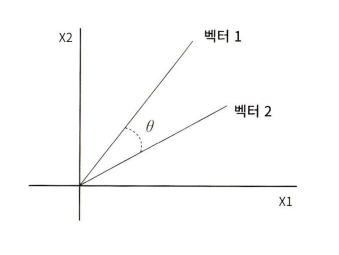

### 두 벡터 사잇각
* 두 벡터의 사잇각에 따라서 상호 관계는 다음과 같이 유사하거나 관련이 없거나 아예 반대 관계가 될 수 있음
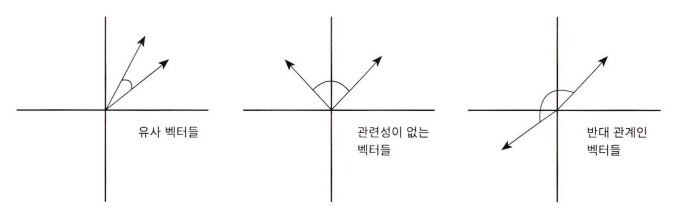

* 두 벡터 A와 B의 내적 값은 두 벡터의 크기를 곱한 값의 코사인 각도 값을 곱한 것

$A * B =  \parallel A \parallel  \parallel B \parallel cos\theta$

* 따라서 유사도 $cos\theta$는 두 벡터의 내적을 총 벡터 크기의 합으로 나눈 것
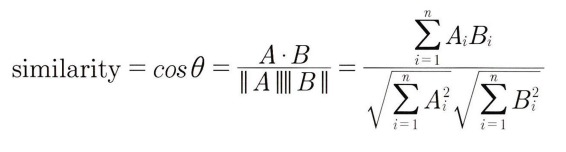


* 코사인 유사도가 문서의 유사도 비교에 가장 많이 이용되는 이유
 * 문서를 피처 벡터화 변환하면 차원이 매우 많은 희소 행렬이 되기 쉬움. 희소 행렬 기반에서 문서와 문서 벡터간의 크기에 기반한 유사도 지표는 정확도가 떨어지기 쉬움.
 * 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이기 때문에 이러한 빈도수에만 기반해서는 공정한 비교를 할 수 없음.

In [5]:
import numpy as np

def cos_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
  similarity = dot_product / l2_norm

  return similarity

* doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ["if you take the blue pill, the story ends",
            "if you take the red pill, you stay in Wonderland",
            "if you take the red pill, I show you how deep the rabbit hole goes"]

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


* 반환된 행렬은 희소 행렬이므로 앞에서 작성한 cos_similarity() 함수의 인자인 array로 만들기 위해 밀집 행렬로 변환한 뒤 다시 각각을 배열로 변환
* feature_vect_dense[0]은 doc_list 첫 번째 문서의 피처 벡터화이며, feature_vect_dense[1]은 doc_list 두 번째 문서의 피처 벡터화.


In [7]:
# TFidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환.
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print("문장 1, 문장 2 Cosine 유사도: {0:.3f}".format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [8]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print("문장 1, 문장 3 Cosine 유사도: {0:.3f}".format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print("문장 2, 문장 3 Cosine 유사도: {0:.3f}".format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


* 사이킷런은 코사인 유사도를 측정하기 위해 sklearn.metrics.pairwise.cosine_similarity API를 제공
* cosine_similarity()는 희소 행렬, 밀집 행렬 모두가 가능하며, 행렬 또는 배열 모두 가능.

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


* 첫 번째 유사도 값인 1은 비교 기준인 첫 번째 문서 자신에 대한 유사도 측정
* 두 번째 유사도 값인 0.40207758은 첫 번째 문서와 두 번째 문서의 유사도
* 0.40425045는 첫 번째 문서와 세 번째 문서의 유사도 값

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


* cosine_similarity()는 쌍으로 코사인 유사도 값을 제공할 수 있음
* 1번째 문서와 2, 3번째 문서의 코사인 유사도, 2번째 문서와 1, 3번째 문서의 코사인 유사도, 3번째 문서와 1, 2번쨰 문서의 코사인 유사도를 ndarray 형태로 제공

In [11]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print("shape: ", similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape:  (3, 3)


* 첫 번째 로우는 1번 문서와 2, 3번째 문서의 코사인 유사도, 두 번째 로우는 2번 문서와 1, 3번째 문서의 코사인 유사도, 세 번째 로우는 3번 문서와 1, 2번째 문서의 코사인 유사도를 나타냄

### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [12]:
from google.colab import drive
drive.mount("/content/drive")

# 경로 이동
%cd /content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1.0/topics

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/opinosis+opinion+frasl+review/OpinosisDataset1.0/topics


In [13]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

nltk.download('punkt')
nltk.download('wordnet')

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)

    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)

    # 단어 원형 추출
    return LemTokens(word_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
import pandas as pd
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

all_files = glob.glob('*.data')
filename_list = []
opinion_text = []

for file_ in all_files:
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
  filename_ = file_.split('\\')[-1]
  filename = filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* 호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도를 알아보도록 함
* 각 문서가 피처 벡터화된 데이터를 cosine_simularity()를 이용해 상호 비교해 유사도 확인
* 이를 위해 호텔을 주제로 군집화된 데이터를 먼저 추출하고 이 데이터에 해당하는 TfidfVectorizer의 데이터를 추출
* DataFrame 객체 변수인 document_df에서 먼저 호텔로 군집화된 문서의 인덱스를 추출한 후, 이 인덱스를 그대로 이용해 TfidfVectorizer 객체 변수인 feature_vect에서 호텔로 군집화된 문서의 피처 벡터를 추출

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label = 1인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df["cluster_label"] == 1].index
print("호텔로 군집화 된 문서들의 DataFrame Index: ", hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시.
comparison_docname = document_df.iloc[hotel_indexes[0]]["filename"]
print("#### 비교 기준 문서명 ", comparison_docname, "와 타 문서 유사도####")

"""document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정."""
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화 된 문서들의 DataFrame Index:  Int64Index([1, 10, 14, 16, 17, 22, 25, 26, 30, 32, 35, 42, 44, 46, 47, 48], dtype='int64')
#### 비교 기준 문서명  bathroom_bestwestern_hotel_sfo 와 타 문서 유사도####
[[1.         0.06189595 0.0430688  0.05221059 0.05846178 0.03638665
  0.06193118 0.32619948 0.38038865 0.11742762 0.51442299 0.11282857
  0.07049362 0.1386783  0.13989623 0.09518068]]


* 첫 번째 문서와 다른 문서 간에 유사도가 높은 순으로 이를 정렬하고 시각화

Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

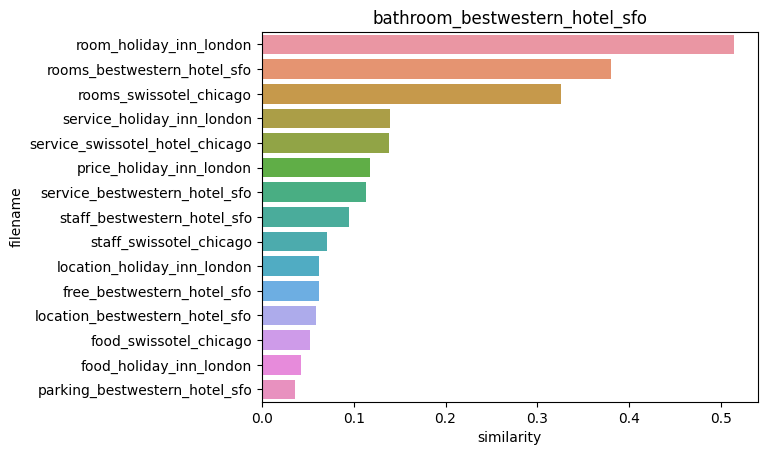

In [16]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외.
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df["filename"] = document_df.iloc[hotel_sorted_indexes]["filename"]
hotel_1_sim_df["similarity"] = hotel_1_sim_value

sns.barplot(x = "similarity", y = "filename", data = hotel_1_sim_df)
plt.title(comparison_docname)

* 첫 번째 문서와 가장 비슷한 문서는 room_holiday_inn_london. 약 0.572의 코사인 유사도를 나타냄.

## 09. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석


### 한글 NLP 처리의 어려움
* 한글 언어 처리가 영어 등의 라틴어 처리보다 어려운 원인은 "띄어쓰기"와 "다양한 조사" 떄문.
* 한글은 띄어쓰기를 잘못하면 의미가 왜곡되어 전달될 수 있음.
* 영어의 경우 띄어쓰기를 잘못하면 의미가 왜곡되는게 아니라 잘못된 또는 없는 단어로 인식됨.
>
* 조사는 주어나 목적어를 위해 추가되며, 워낙 경우의 수가 많기 때문에 어근 추출 등의 전처리 시 제거하기가 까다로움.


### KoNLPy 소개
* KoNLPy는 파이썬의 대표적인 한글 형태소 패키지
* 형태소: 단어로서 의미를 가지는 최소 단위
* 형태소 분석: 말뭉치를 이러한 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅을 부착하는 작업
* KoNLPy 이전에는 파이썬 기반의 형태소 분석 프로그램이 거의 없었으며, 대부분의 형태소 분석은 C/C++과 Java 기반 패키지로 개발됨
* KoNLPy는 기존의 C/C++, Java로 잘 만들어진 한글 형태소 엔진을 파이썬 래퍼 기반으로 재작성한 패키지
* 기존의 엔진은 그대로 유지한 채 파이썬 기반에서 인터페이스를 제공하기 때문에 검증된 패키지의 안정성을 유지할 수 있음
* 꼬꼬마, 한나눔, Komoran, 은전한닢 프로젝트, Twitter와 같이 5개의 형태소 분석 모듈을 KoNLPy에서 모두 사용할 수 있음.
* 뛰어난 형태소 분석으로 인정받고 있는 Mecab의 경우는 윈도우 환경에서는 구동되지 않음.


In [17]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 30.5 MB/s eta 0:00:00


### 데이터 로딩


In [31]:
import os
os.chdir('/content')

In [32]:
import pandas as pd
train_df = pd.read_csv("ratings_train.txt", sep = "\t")
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


* 1이 긍정, 0이 부정 감성

In [33]:
train_df["label"].value_counts()

0    75173
1    74827
Name: label, dtype: int64

* 0과 1의 비율이 어느 한쪽으로 치우치지 않고 균등한 분포를 나타냄
* train_df의 경우 리뷰 텍스트를 가지는 "document" 칼럼에 Null이 일부 존재하므로 이 값은 공백으로 변환
* 문자가 아닌 숫자의 경우 단어적인 의미로 부족하므로 파이썬의 정규 표현식 모듈인 re를 이용해 이 역시 공백으로 변환
* 테스트 데이터 세트의 경우도 파일을 로딩하고 동일한 데이터 가공을 수행

In [34]:
import re

train_df = train_df.fillna(" ")
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함.)
train_df["document"] = train_df["document"].apply(lambda x: re.sub(r"\d+", " ", x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv("ratings_test.txt", sep = "\t")
test_df = test_df.fillna(" ")
test_df["document"] = test_df["document"].apply(lambda x: re.sub(r"\d", " ", x))

# id 칼럼 삭제 수행
train_df.drop("id", axis = 1, inplace = True)
test_df.drop("id", axis = 1, inplace = True)

* TF-IDF 방식으로 단어를 벡터화하기 전, 각 문장을 한글 형태소 분석을 통해 형태소 단어로 토큰화
* 한글 형태소 엔진은 SNS 분석에 적합한 Twitter 클래스를 이용
* Twitter 객체의 morphs() 메서드를 이용하면 입력 인자로 들어온 문장을 형태소 단어 형태로 토큰화해 list 객체로 반환
* 문장을 형태소 단어 형태로 반환하는 별도의 tokenizer 함수를 tw_tokenizer()라는 이름으로 생성

In [35]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


* 사이킷런의 TfidfVectorizer를 이용해 TF-IDF 피처 모델을 생성
* tokenizer는 위에서 만든 tw_tokenizer() 함수를 이용

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1, 2)
tfidf_vect = TfidfVectorizer(tokenizer = tw_tokenizer, ngram_range = (1, 2), min_df = 3, max_df = 0.9)
tfidf_vect.fit(train_df["document"])
tfidf_matrix_train = tfidf_vect.transform(train_df["document"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* 로지스틱 회귀를 이용해 분류 기반의 감성 분석을 수행

In [37]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행.
lg_clf = LogisticRegression(random_state = 0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {"C": [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid = params, cv = 3, scoring = "accuracy", verbose = 1)
grid_cv.fit(tfidf_matrix_train, train_df["label"])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 3.5} 0.8593


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
